In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [36]:
M = 10**6
G = 10**9
T = 10**12
seconds_in_year = 31536000
hours_in_year = 8760
kWh_to_J = 3600*10**3
W_to_Wh = hours_in_year

# Values

## Bitcoin Mining and its Energy Footprint (2014)

In [42]:
# Mid march
BMEF_date = datetime.datetime(2014, 3, 15)
BMEF = {'lower': 0.1*G*W_to_Wh, 'estimate': 3*G*W_to_Wh, 'upper': 10*G*W_to_Wh}

## Bitcoin Miners True Energy Consumption (2017)

In [41]:
BMTEC_date = datetime.datetime(2017, 6, 15)
BMTEC_estimate = 33.56*T

## BECI

In [58]:
BECI = pd.read_csv('data/BECI_TWh.csv')
BECI['Date'] = pd.to_datetime(BECI['Date'])
BECI = BECI.set_index('Date')
BECI_avg = BECI.groupby(pd.Grouper(freq='M')).mean()
BECI_avg = BECI_avg.rename(columns={'Estimated TWh per Year': 'estimation', 'Minimum TWh per Year': 'lower'})
BECI_avg = BECI_avg*T

## CBECI

In [59]:
CBECI = pd.read_csv('data/CBECI.csv')
CBECI = CBECI.rename(columns={'Date and Time': 'Date', 'MAX': 'upper', 'MIN': 'lower', 'GUESS': 'estimation'})
CBECI['Date'] = pd.to_datetime(CBECI['Date'])
CBECI = CBECI.set_index('Date')
CBECI = CBECI.drop(columns=['Timestamp'])
CBECI_avg = CBECI.groupby(pd.Grouper(freq='M')).mean()
CBECI_avg = CBECI_avg*T

## Mark Bevand

In [66]:
dates = [datetime.datetime(2017, 2, 26), datetime.datetime(2017,7,28), datetime.datetime(2018,1,11)]
MB = pd.DataFrame({'lower': [2.85, 5.61, 14.19], 'estimate': [4.43, 7.6, 18.4], 'upper': [6.78,10.93,27.47]}, index=dates)
MB = MB*T

# Plot

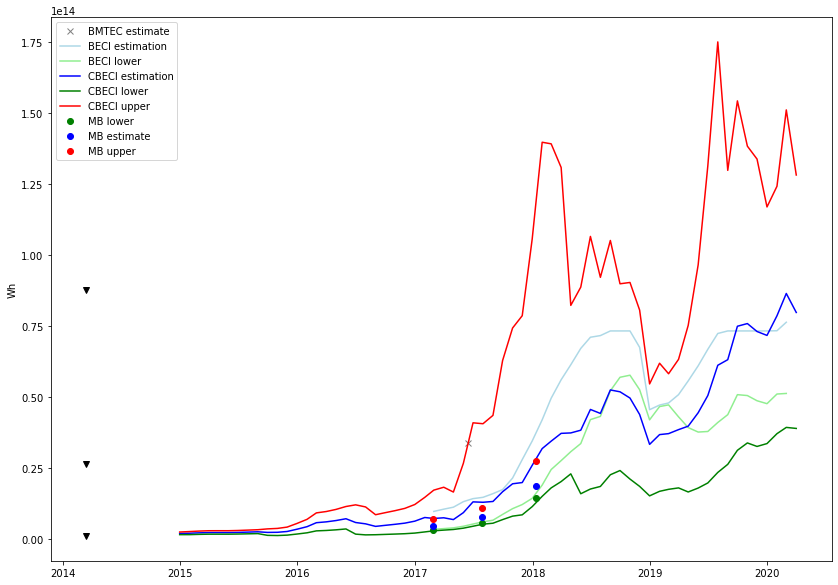

In [83]:
plt.figure(figsize=(14,10))

# BMEF
for value in BMEF.values():
    plt.plot(BMEF_date, value, 'v', color='black')
    
plt.plot(BMTEC_date,BMTEC_estimate, 'x', color='grey', label = 'BMTEC estimate')

# BECI
plt.plot(BECI_avg['estimation'], color = 'lightblue', label='BECI estimation')
plt.plot(BECI_avg['lower'], color = 'lightgreen', label='BECI lower')

# CBECI
plt.plot(CBECI_avg['estimation'], color='blue',label='CBECI estimation')
plt.plot(CBECI_avg['lower'], color='green',label='CBECI lower')
plt.plot(CBECI_avg['upper'], color='red',label='CBECI upper')

# Mark Bevand
plt.plot(MB['lower'],'go', label='MB lower')
plt.plot(MB['estimate'],'bo', label='MB estimate')
plt.plot(MB['upper'],'ro', label='MB upper')

# Options
plt.legend()
plt.ylabel('Wh')
plt.show()

In [6]:
x = datetime.datetime(2020, 1, 1)
y = 100